## Second Best Practices in Data Analysis and Statistics Symposium (Budapest, 2019)
### Resampling: doing classical statistics the easy way
#### Ricardo Vieira

In [1]:
# Importing external libraries
import numpy as np
import matplotlib.pyplot as plt

## Introduction: Two approaches to a "simple" probability problem
### 1. The analytic approach

In [2]:
def binomial(x,N,px):
    n_chose_k = np.math.factorial(N) / (np.math.factorial(x)*np.math.factorial(N-x))
    prob = n_chose_k * (px**x) * ((1-px)**(N-x))
    return prob

In [3]:
prob_3 = binomial(x=3,N=4,px=0.5) 
prob_4 = binomial(x=4, N=4, px=0.5)
total_prob = prob_3 + prob_4
print(prob_3, prob_4, total_prob)

0.25 0.0625 0.3125


### 2. The simulation approach
#### 2.1 Physical simulation

In [4]:
results=[]
np.sum(results) / (len(results)*4)

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


nan

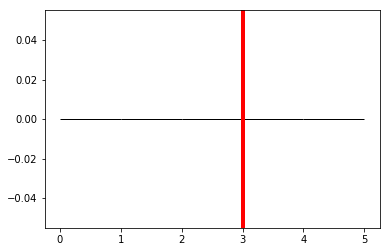

In [5]:
plt.hist(results, bins=np.arange(0,6), ec='k')
plt.axvline(3, c='red', linewidth=4);

#### 2.2 Virtual simulation

In [6]:
bag = [0]*4 + [1]*4
print(bag)

[0, 0, 0, 0, 1, 1, 1, 1]


In [7]:
np.random.choice(bag, 4, replace=True)

array([0, 0, 1, 1])

In [8]:
obtained_samples = []
matching_samples = 0
total_samples = 30

for i in range(total_samples):
    sample = np.random.choice(bag, 4, replace=True)
    
    sample_sum = sum(sample)
    
    obtained_samples.append(sample_sum)
    
    if sample_sum >= 3: # Fits problem condition
        matching_samples += 1

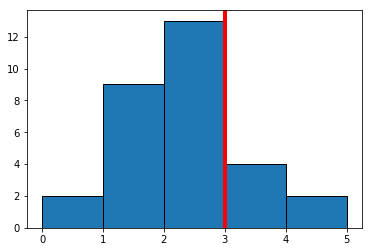

In [9]:
plt.hist(obtained_samples, bins=np.arange(0,6), ec='k')
plt.axvline(3, c='red', linewidth=4);

In [10]:
print('Calculated probability =', matching_samples/total_samples)

Calculated probability = 0.2


## Example 1: Count Data

In [11]:
method1 = [16, 4]
method2 = [12, 8]

In [12]:
# Step 1: Chose a meaningful comparison statistic
statistic = 0

In [44]:
# Step 2: Simulate the random process that generated the data
bag = [1]*(28) + [0]*(12)
print(bag)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [52]:
sample1 = np.random.choice(bag, 20, replace=True)
sample2 = np.random.choice(bag, 20, replace=True)
print(sample1, sample2)

[1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1] [1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0]


In [53]:
# Step 3: Calculate the test statistic for several simulated samples
sample_statistic = sum(sample1) - sum(sample2)
print(sum(sample1), sum(sample2), sample_statistic)

12 15 -3


In [17]:
# Steps 1-3:
obtained_samples = []
matching_samples = 0
total_samples = 30
for i in range(total_samples):
    sample1 = np.random.choice(bag, 20, replace=True)
    sample2 = np.random.choice(bag, 20, replace=True)
    
    sample_statistic = sum(sample1) - sum(sample2)
    
    obtained_samples.append(sample_statistic)
    
    # Step 5: Compute a point estimate such as the pvalue (optional)
    if sample_statistic <= -4 or sample_statistic >= 4:
        matching_samples += 1

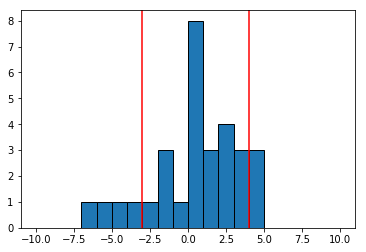

In [18]:
# Step 4: Analyze the distribution of the sampled test statistics
plt.hist(obtained_samples, ec='k', bins=np.linspace(-10,10,21))
plt.axvline(-4+1, color='red')
plt.axvline(4, color='red');

In [19]:
# Step 5: Compute a point estimate such as the pvalue (optional)
print('Probability of chance = ', matching_samples/total_samples)

Probability of chance =  0.23333333333333334


## Example 2: Ranked Data
### 2.1: Proportion of ranks in top half

In [20]:
method1 = [2, 3.5, 3.5, 5.5, 5.5, 7, 10.5, 10.5, 10.5, 10.5, 10.5, 15.5, 15.5, 19, 22, 22, 25.5, 29, 39, 40]
method2 = [1, 10.5, 15.5, 15.5, 19, 19, 22, 25.5, 25.5, 25.5, 29, 29, 31.5, 31.5, 34, 34, 34, 36.5, 36.5, 38]

In [21]:
# Step 1: Chose a meaningful comparison statistic
np.sum(np.array(method1) >= 20), np.sum(np.array(method2) >= 20)

(6, 14)

In [54]:
# Step 2: Simulate the random process that generated the data
ranks = np.arange(40)
ranks

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [55]:
sample = np.random.choice(ranks, 20, replace=False)
np.sort(sample)

array([ 2,  5,  9, 10, 11, 12, 13, 14, 17, 18, 22, 24, 25, 26, 28, 29, 30,
       33, 35, 38])

In [57]:
# Step 3: Calculate the test statistic for several simulated samples
sample_statistic = np.sum(sample >= 20)
sample_statistic

10

In [25]:
# Steps 1-3
ranks = np.arange(40)

obtained_samples = []
matching_samples = 0
total_samples = 30

for i in range(total_samples):
    sample = np.random.choice(ranks, 20, replace=False)
    
    sample_statistic = np.sum(sample >= 20)
    
    obtained_samples.append(sample_statistic)
    
    # Step 5: Compute a point estimate such as the pvalue (optional)
    if sample_statistic <= 6 or sample_statistic >= 14: # Two tailed test
        matching_samples += 1

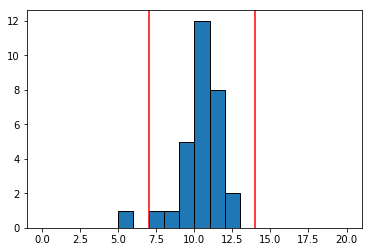

In [26]:
# Step 4: Analyze the distribution of the sampled test statistics
plt.hist(obtained_samples, ec='k', bins=np.linspace(0,20,21))
plt.axvline(7, c='red')
plt.axvline(14, c='red');

In [27]:
# Step 5: Compute a point estimate such as the pvalue (optional)
print('Probability of chance:', matching_samples/total_samples)

Probability of chance: 0.03333333333333333


### 2.2: Mean ranks

In [28]:
method1_ranks = [2, 3.5, 3.5, 5.5, 5.5, 7, 10.5, 10.5, 10.5, 10.5, 10.5, 15.5, 15.5, 19, 22, 22, 25.5, 29, 39, 40]
method2_ranks = [1, 10.5, 15.5, 15.5, 19, 19, 22, 25.5, 25.5, 25.5, 29, 29, 31.5, 31.5, 34, 34, 34, 36.5, 36.5, 38]

In [29]:
np.mean(method1_ranks), np.mean(method2_ranks)

(15.35, 25.65)

In [30]:
empirical_statistic = 25.65 - 15.35
empirical_statistic

10.299999999999999

In [31]:
ranks = method1 + method2
np.random.shuffle(ranks)
sample1 = ranks[:20]
sample2 = ranks[20:]
np.mean(sample1), np.mean(sample2), np.mean(sample1) - np.mean(sample2)  

(20.9, 20.1, -0.7999999999999972)

In [32]:
# All together
empirical_statistic = 25.65 - 15.35 

ranks = method1 + method2

obtained_samples = []
matching_samples = 0
total_samples = 30

for i in range(total_samples):
    np.random.shuffle(ranks)
    sample1 = ranks[:20]
    sample2 = ranks[20:]
   
    sample_statistic = np.mean(sample1) - np.mean(sample2)
    
    obtained_samples.append(sample_statistic)
    
    if abs(sample_statistic) >= empirical_statistic: # Two-sided test
        matching_samples += 1

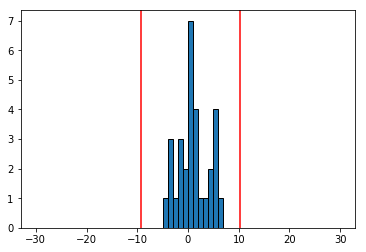

In [33]:
plt.hist(obtained_samples, ec='k', bins=np.linspace(-30,30,61));
plt.axvline(-statistic+1, c='red');
plt.axvline(statistic, c='red');

In [34]:
print('Probability of chance:', matching_samples/total_samples)

Probability of chance: 0.0


## Problem 3: Measured Data

In [35]:
method1 = [5, 11, 12, 15, 24, 24, 25, 27, 31, 31, 34, 36, 49, 51, 58, 58, 66,  67, 80, 88]
method2 = [16, 22, 26, 40, 48, 52, 56, 58, 59, 60, 63, 68, 68, 70, 72, 73, 79, 82, 82, 96]

In [36]:
empirical_statistic = np.mean(method2) - np.mean(method1)
print('Empirical Statistic:', empirical_statistic)

bag = method1 + method2

obtained_samples = []
matching_samples = 0
total_samples = 30

for i in range(total_samples):
    sample1 = np.random.choice(bag, 20, replace=True)
    sample2 = np.random.choice(bag, 20, replace=True)
    
    sample_statistic = np.mean(samlpe1) - np.mean(sample)
    
    obtained_samples.append(sample_statistic)
    
    if abs(sample_statistic) >= empirical_statistic: # Two-sided test
        matching_samples += 1

Empirical Statistic: 19.9


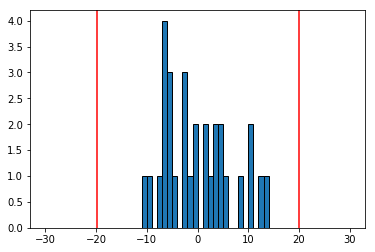

In [37]:
plt.hist(obtained_samples, ec='k', bins=np.linspace(-30,30, 61))
plt.axvline(-statistic, c='red')
plt.axvline(statistic, c='red');

In [38]:
print('Probability of chance:', matching_samples/total_samples)

Probability of chance: 0.0


In [39]:
# Rather similar to the parametric alternative
import scipy.stats as st
st.ttest_ind(method1, method2)

Ttest_indResult(statistic=-2.807952070400052, pvalue=0.007827679292708214)

## Suggested problems
### 1. Comparison between 3 treatments
Three different flashy educational interventions (t1, t2, t3) are conducted on three separate samples of students. The effectiveness of each intervention is measured at the end of the trial using a standard test (value range: 0-3). The means obtained for each group are, respectively, 0.875, 1.33, and 1.683.

The researcher wants to know if the effect of intervention could be easily explained by chance, before proceding to study what aspects of the interventions might lead to changes in performance.

In [40]:
t1 = [0.5, 0.9, 0.8, 0.9, 0.3, 1.2, 0.7, 1.7, 0.4, 0.3, 2. , 0.8]
t2 = [2.8, 2. , 1.2, 1. , 1.3, 1.7, 0.8, 1.4, 0.4, 0.9, 1.3, 1.2]
t3 = [2.5, 1.6, 1.6, 1.5, 2.3, 2.3, 0.4, 1.3, 2. , 1.9, 1.5, 1.3]

### 2. Proportion of scientists who are firstborn siblings
In a recent personal project, I was interested in the hypothesis that firstborn siblings tend to be more attracted to highly intelectual professions like science research. I did a small survey in a research center, asking workers there whether they had any siblings, and if so, how did they rank in terms of birth order.

The data below shows the total number of participants that had 1,2,3, and 4 siblings (second column), and for each subgroup, how many were firstborns (first column). For instance, the second row shows that of 16 participants who reported having 2 siblings, 7 were firstborns.

I am interested in evaluating whether the overall number of first borns was higher than expected by chance (respectively: 50%, 33%, 25%, 20%, for those with 1, 2, 3, or 4 siblings). How could I do this?

In [41]:
# 1st column: number of firstborns; 2nd column: total number of respondents
one_sibling    = [34, 57]
two_siblings   = [7, 16]
three_siblings = [3, 6]
four_siblings  = [0, 2]

### 3. Test performance before and after an intervention

A researcher studying the effectiveness of an intervention over cognitive performance, conducted a within-subject design, where each participant was tested once before and ater the intervention. The results are shown below:

Each row contains data pertaining to the same participant, with the performance in the pre-test in the first column, and performance in the post-test in the second column.

The mean individual change in performance from pre-to-post-test 0.85 (pre-test-performance = 5, post-test-performance = 5.8). Could this difference be due to chance?

In [42]:
# Each row corresponds to one participant
# 1st column: performance before intervention, 2nd column: performanec after intervention
data = [[4.6, 5.8],
       [7. , 7.6],
       [5.1, 5.7],
       [6.5, 7.2],
       [3.2, 8. ],
       [3.8, 4.2],
       [5.9, 5.8],
       [4.7, 5. ],
       [4.5, 7.1],
       [4.5, 5.9],
       [3.5, 3.5],
       [4.9, 5.9],
       [4.5, 6.1],
       [7.6, 7.1],
       [3.7, 3.9],
       [4.7, 5.8],
       [6.2, 6. ],
       [4.2, 4.9],
       [5. , 4.3],
       [6. , 6.2]]

### 4. Change in proportion of successes  among low-middle-high SES

After submitting a study for publication, a researcher receives a request from one of the reviewers to assess the potential modulatory effects of familial socio-economic-status (SES) on the proportion of students who passed the test. 

Unable to persuade the reviewer otherwise, the researcher compiles the data below. It shows the proportion of students that passed (1st column) and failed (2nd column) for each of the 3 brackets of familial SES.

In [43]:
# 1st column: number of students who passed the test; 2nd column: number of students who failed the test
low_SES = [9,6]
mid_SES = [6, 11],
high_SES = [11,4]